In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader , random_split
from torchvision.models import mobilenet_v3_large

# speed up 
from torch.cuda.amp import GradScaler , autocast
import numpy as np

from rich import print
from tqdm import tqdm
import os
from time import time

In [2]:
device = torch.device( "cpu") # "cuda" if torch.cuda.is_available() else
device

device(type='cpu')

In [3]:
transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
import os 

folder_name = os.listdir("./data")
folder_name

['BOO', 'HOT']

In [5]:
from PIL import Image
import random as rd

In [6]:
def to_model_input_format(image ,transform):
        img_tensor = transform(image)
        img_tensor = img_tensor[np.newaxis, :]
        return img_tensor

def random_simple_test_case(folder_path:str , number:int=10):
    assert os.path.exists(folder_path)
    
    
    
    image_paths = [os.path.join(folder_path , item) for item in os.listdir(folder_path)]
    image_paths_rd = rd.sample(image_paths , k=number)
    image_lists = [Image.open(path) for path in image_paths_rd]
#     image_lists = [to_model_input_format(image , transform) for image in image_lists]
    
    return image_lists

In [7]:
boo_images = random_simple_test_case("./data/BOO" )
boo_images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1365x2048>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x902>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1745>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=676x1200>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x1280>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1025x1280>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x1341>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=959x1280>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1109x1479>]

In [8]:
hot_images = random_simple_test_case("./data/HOT" )
hot_images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x1350>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x670>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1800>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x1350>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x1200>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1170x1560>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1140x1437>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x1795>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1165x793>]

In [9]:
model = mobilenet_v3_large()

num_features = model.classifier[-1].in_features
# output only two class 
model.classifier[-1] = nn.Linear(num_features , 5)

model.load_state_dict(torch.load("./model\mobileNet_v3_v8_28_BOTH.pth" , map_location="cpu"))
model.eval()

# model = model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [10]:
from collections import Counter

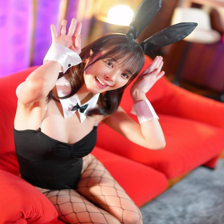

Model prediction 3

========================================================

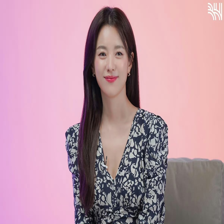

Model prediction 3

========================================================

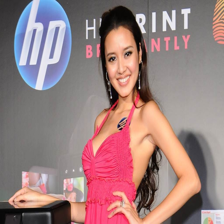

Model prediction 3

========================================================

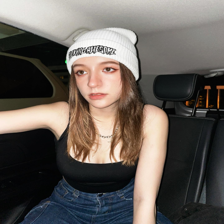

Model prediction 3

========================================================

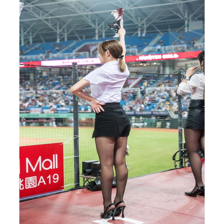

Model prediction 3

========================================================

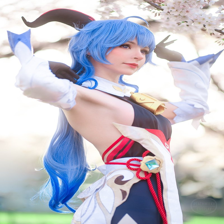

Model prediction 3

========================================================

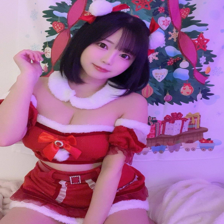

Model prediction 3

========================================================

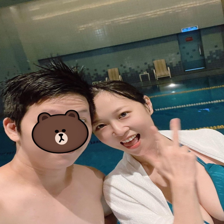

Model prediction 3

========================================================

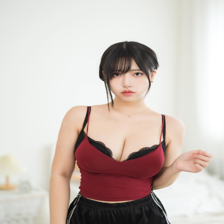

Model prediction 3

========================================================

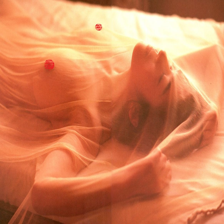

Model prediction 3

========================================================

Counter({3: 10})

acc : 0.0

In [11]:
result = []
for image in hot_images:
    display(image.resize((224,224)))
    
    img_tensor = to_model_input_format(image , transform_test)
    # img_tensor = img_tensor.to(device)
    
    pred_prob = model(img_tensor)
    pred = torch.max(pred_prob,1).indices
    pred = pred.item()
    
    
    print(f"Model prediction {pred}")

    print("========================================================")
    result.append(pred)
c = Counter(result)
print(c)
print(f"acc : {c[1] / len(hot_images)}")

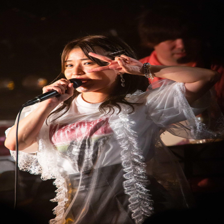

Model prediction 4 ,tensor:tensor([[ -0.3471,  -3.1636,  -5.0908, -10.4070,  13.5410]],
       grad_fn=<AddmmBackward0>), argmax : 4

========================================================

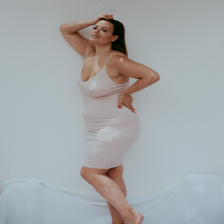

Model prediction 0 ,tensor:tensor([[ 14.6167,  -6.6339,   4.1146,  -4.1937, -12.3431]],
       grad_fn=<AddmmBackward0>), argmax : 0

========================================================

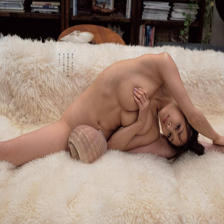

Model prediction 1 ,tensor:tensor([[-0.3203,  3.1793, -0.1566, -4.1961, -1.1681]],
       grad_fn=<AddmmBackward0>), argmax : 1

========================================================

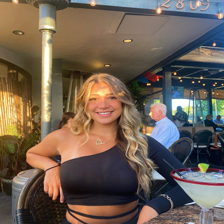

Model prediction 4 ,tensor:tensor([[-3.8496, -0.6841, -2.6158, -4.5699,  7.5468]],
       grad_fn=<AddmmBackward0>), argmax : 4

========================================================

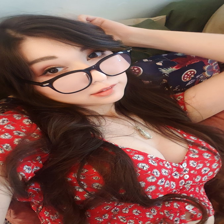

Model prediction 0 ,tensor:tensor([[ 3.3955, -1.4120,  2.8446, -2.9940, -3.4218]],
       grad_fn=<AddmmBackward0>), argmax : 0

========================================================

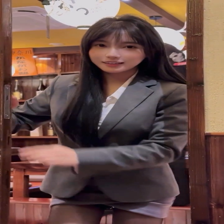

Model prediction 0 ,tensor:tensor([[ 4.6445, -5.7208,  4.3197, -2.4083, -5.0553]],
       grad_fn=<AddmmBackward0>), argmax : 0

========================================================

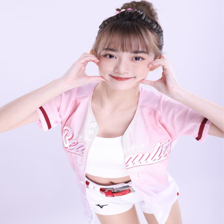

Model prediction 2 ,tensor:tensor([[-0.2197, -1.3537,  3.3882, -0.5147, -1.4365]],
       grad_fn=<AddmmBackward0>), argmax : 2

========================================================

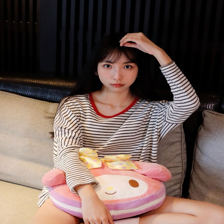

Model prediction 4 ,tensor:tensor([[ 1.1224, -3.0999, -1.2337, -6.9316,  6.2762]],
       grad_fn=<AddmmBackward0>), argmax : 4

========================================================

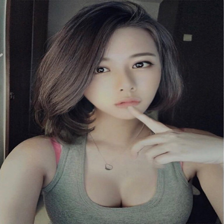

Model prediction 1 ,tensor:tensor([[-4.4842,  7.7099, -0.8297, -4.6244, -0.1569]],
       grad_fn=<AddmmBackward0>), argmax : 1

========================================================

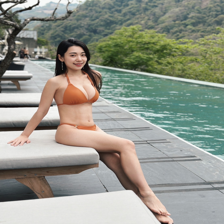

Model prediction 4 ,tensor:tensor([[ 1.1267, -0.5710, -4.3534, -1.9926,  3.9532]],
       grad_fn=<AddmmBackward0>), argmax : 4

========================================================

Counter({4: 4, 0: 3, 1: 2, 2: 1})

acc: 0.3

In [14]:
result = []
for image in boo_images:
    display(image.resize((224,224)))
    
    img_tensor = to_model_input_format(image , transform_test)
    # img_tensor = img_tensor.to(device)
    
    pred_prob = model(img_tensor)
    
    pred = torch.max(pred_prob,1).indices
    pred = pred.item()
    
    
    print(f"Model prediction {pred} ,tensor:{pred_prob}, argmax : {torch.argmax(pred_prob)}")

    print("========================================================")
    result.append(pred)
    
c = Counter(result)
print(c)
print(f"acc: {c[0] / len(boo_images)}")

In [13]:
from sklearn.metrics import f1_score